In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import joblib

import librosa
import IPython.display as ipd

In [40]:
from google.colab import drive
import glob

# 1. 구글 드라이브 마운트
drive.mount('/content/drive')

# 2. 데이터가 저장된 경로 지정
root = '/content/drive/MyDrive/119DATA_50/'

# 3. 오디오 파일(wav) 탐색
files = sorted(glob.glob(root + '**/*.wav', recursive=True))
print(len(files))
file_num = len(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
200


In [41]:
def wav_info(file):
    data,sr = librosa.load(file)
    print(f"data length: {len(data)}, sampling rate: {sr}")
    ipd.display(ipd.Audio(data, rate=sr))

    fig,ax = plt.subplots(1,3,figsize=(12,3))
    ax[0].plot(data)
    ax[0].set_title(f"{file.split('/')[-1]}, sr={sr}")

    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(mel, x_axis='time', y_axis='mel', ax=ax[1])
    ax[1].set_title(f"{mel.shape}")

    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    librosa.display.specshow(mfcc, x_axis='time', ax=ax[2])
    ax[2].set_title(f"{mfcc.shape}")
    plt.tight_layout()
    plt.show()

num = np.random.randint(0,file_num,10) #file_num : 파일 개수에 맞게 넣어야함
for file in np.array(files)[num]:
    wav_info(file)

Output hidden; open in https://colab.research.google.com to view.

data length: 663264, sampling rate: 22050


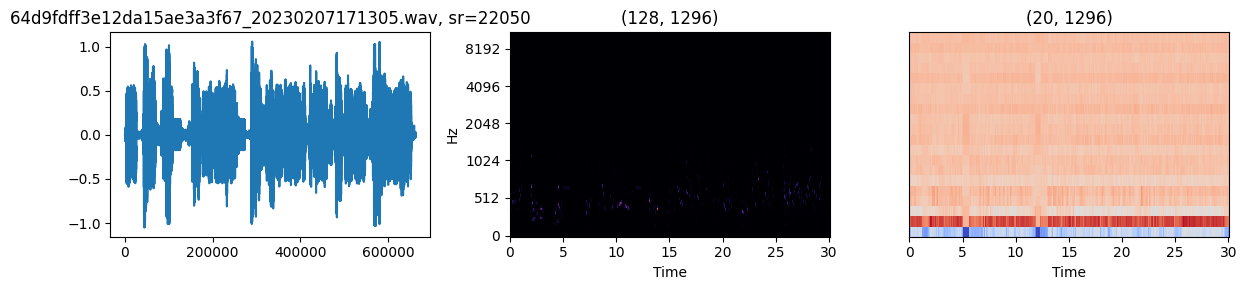

In [43]:
def extract_features(file):
    data, sr = librosa.load(file)
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    return {
        #"filename": file.split("/")[-1],
        "filename": file,
        "length": len(data),
        "sampling_rate": sr,
        "mfcc_mean": mfcc.mean(),
        "mfcc_std": mfcc.std()
    }

# 예: 50개 랜덤 샘플만 테스트
num = np.random.randint(0, len(files), 50)
feature_list = []

for file in np.array(files)[num]:
    feature_list.append(extract_features(file))

df = pd.DataFrame(feature_list)
df.head() #상위5개레코드

df.describe()

df_diff = pd.DataFrame([df.iloc[df.length.argmin()],df.iloc[df.length.argmax()]])
df_diff = df_diff.reset_index(drop=True)
df_diff

wav_info(df_diff.filename[0])

